In [1]:
import pandas as pd
from graphics_functions import *
import pymysql
from sqlalchemy import create_engine
import getpass  # Para obtener la contraseña sin mostrar la entrada
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Obtener la contraseña de forma segura
password = getpass.getpass()

# Configuración de la base de datos y la conexión
bd = "project_ue"
connection_string = 'mysql+pymysql://root:' + password + '@localhost/' + bd
engine = create_engine(connection_string)

    gender  avg_edu
0  Females     2.90
1    Males     2.69


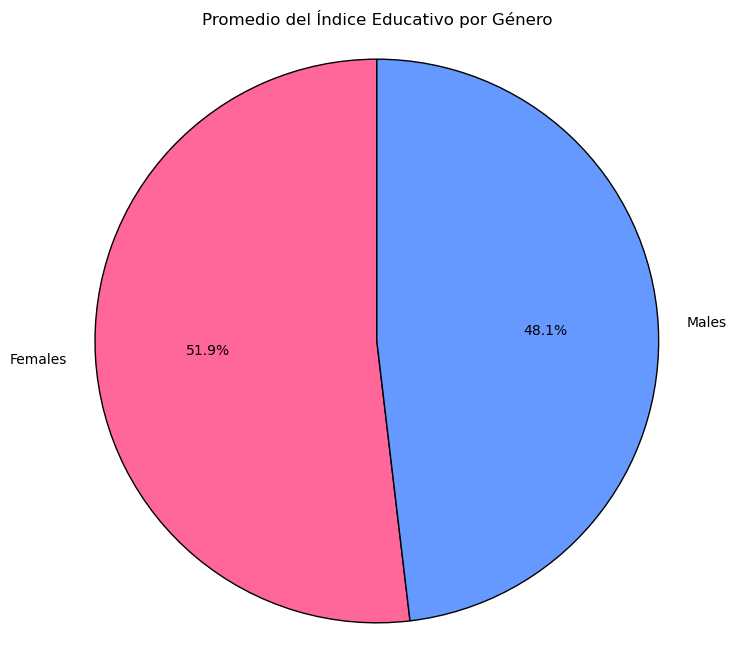

In [3]:
plot_avg_education_pie_by_gender(engine)

            country  avg_edu
0            Cyprus     3.23
1    United Kingdom     3.21
2             Italy     3.15
3       Netherlands     3.02
4            France     3.01
5           Hungary     2.91
6   North Macedonia     2.90
7           Germany     2.88
8           Belgium     2.87
9            Poland     2.85
10         Bulgaria     2.84
11            Spain     2.83
12          Finland     2.82
13         Portugal     2.81
14          Austria     2.80
15          Croatia     2.80
16           Serbia     2.80
17          Romania     2.79
18           Sweden     2.75
19           Latvia     2.73
20          Estonia     2.72
21           Greece     2.70
22          Ireland     2.70
23           Norway     2.70
24          Iceland     2.68
25      Switzerland     2.67
26          Czechia     2.60
27          Denmark     2.60
28         Slovenia     2.59
29        Lithuania     2.57
30          Türkiye     2.50
31         Slovakia     2.48


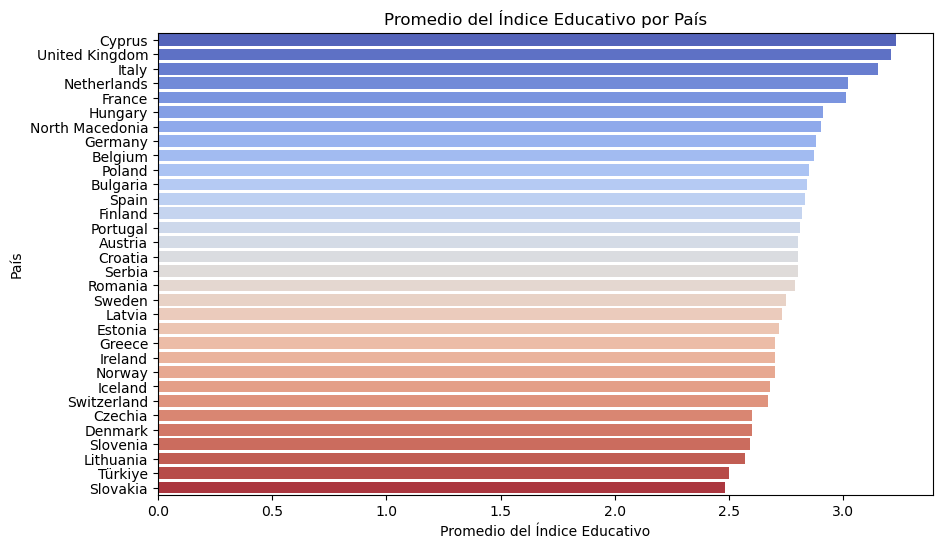

In [4]:
plot_avg_education_by_country(engine)

    gender  avg_unem
0  Females     16.45
1    Males     14.77


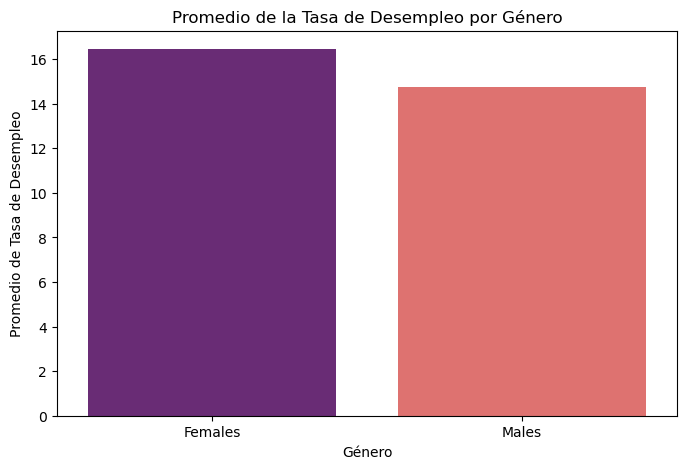

In [5]:
plot_avg_unemployment_by_gender(engine)

  level_education  avg_unem
0             ESO     24.74
1            BACH     14.86
2         BACH-FP     14.03
3              FP     13.75
4     UNIVERSIDAD     10.63


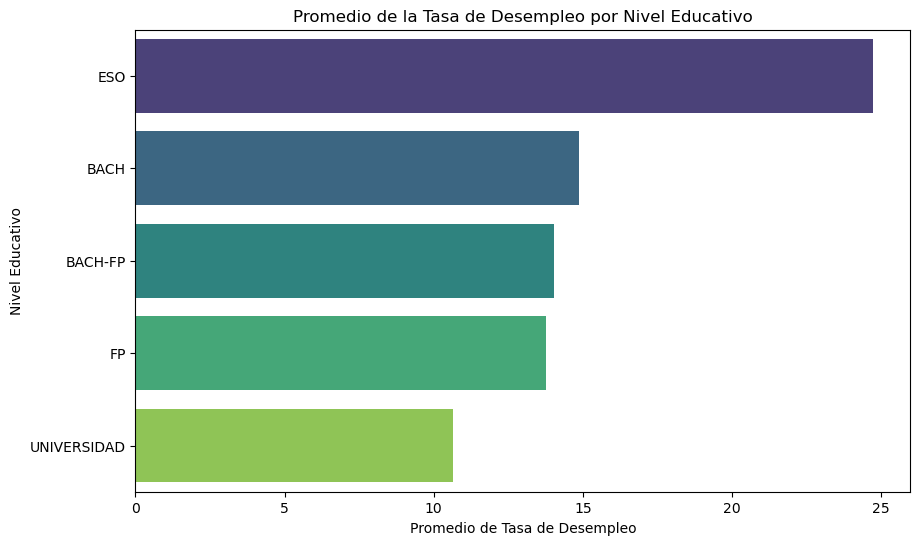

In [6]:
plot_avg_unemployment_by_education_level(engine)

   year  avg_unem  avg_edu
0  2014     20.07     2.75
1  2015     18.49     2.76
2  2016     17.45     2.78
3  2017     15.69     2.78
4  2018     14.22     2.80
5  2019     13.42     2.81
6  2020     15.39     2.81
7  2021     14.70     2.82
8  2022     13.19     2.81
9  2023     13.16     2.81


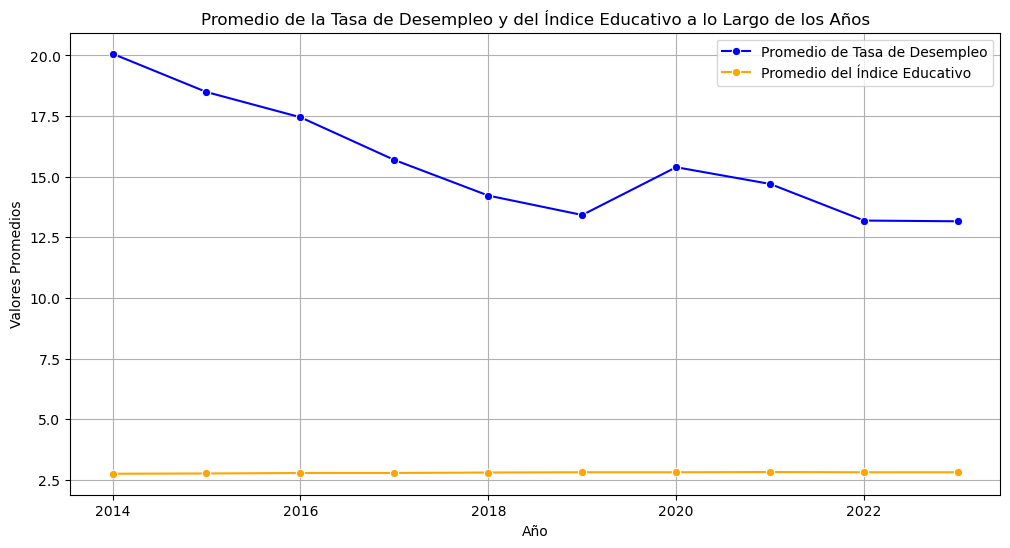

In [7]:
plot_avg_unemployment_and_education_by_year(engine)

In [8]:
# Leer la consulta SQL en un DataFrame
consulta = "SELECT c.country_name AS country, MIN(d.indice_educativo) AS minimum FROM project_ue.country AS c LEFT JOIN project_ue.datos_educativos AS d ON d.id_country = c.id_country WHERE d.indice_educativo = (SELECT MIN(d2.indice_educativo) FROM project_ue.datos_educativos AS d2) GROUP BY c.country_name" #AQUI PEGAR LA QUERY SIN ;  EN UN SOLO BLOQUE 
min_edu = pd.read_sql(consulta, con=engine)
min_edu

,country,minimum
0,Türkiye,2.26


In [9]:
# Leer la consulta SQL en un DataFrame
consulta = "SELECT c.country_name AS country, MAX(d.indice_educativo) AS maximum FROM project_ue.country AS c LEFT JOIN project_ue.datos_educativos AS d ON d.id_country = c.id_country WHERE d.indice_educativo = (SELECT MAX(d2.indice_educativo) FROM project_ue.datos_educativos AS d2) GROUP BY c.country_name" #AQUI PEGAR LA QUERY SIN ;  EN UN SOLO BLOQUE 
max_edu = pd.read_sql(consulta, con=engine)
max_edu

,country,maximum
0,Cyprus,3.46


            country  avg_edu    categoria_educativa
0            Cyprus     3.23   Nivel educativo alto
1    United Kingdom     3.21   Nivel educativo alto
2             Italy     3.15   Nivel educativo alto
3       Netherlands     3.02   Nivel educativo alto
4            France     3.01   Nivel educativo alto
5           Hungary     2.91  Nivel educativo medio
6   North Macedonia     2.90  Nivel educativo medio
7           Germany     2.88  Nivel educativo medio
8           Belgium     2.87  Nivel educativo medio
9            Poland     2.85  Nivel educativo medio
10         Bulgaria     2.84  Nivel educativo medio
11            Spain     2.83  Nivel educativo medio
12          Finland     2.82  Nivel educativo medio
13         Portugal     2.81  Nivel educativo medio
14          Austria     2.80  Nivel educativo medio
15          Croatia     2.80  Nivel educativo medio
16           Serbia     2.80  Nivel educativo medio
17          Romania     2.79  Nivel educativo medio
18          

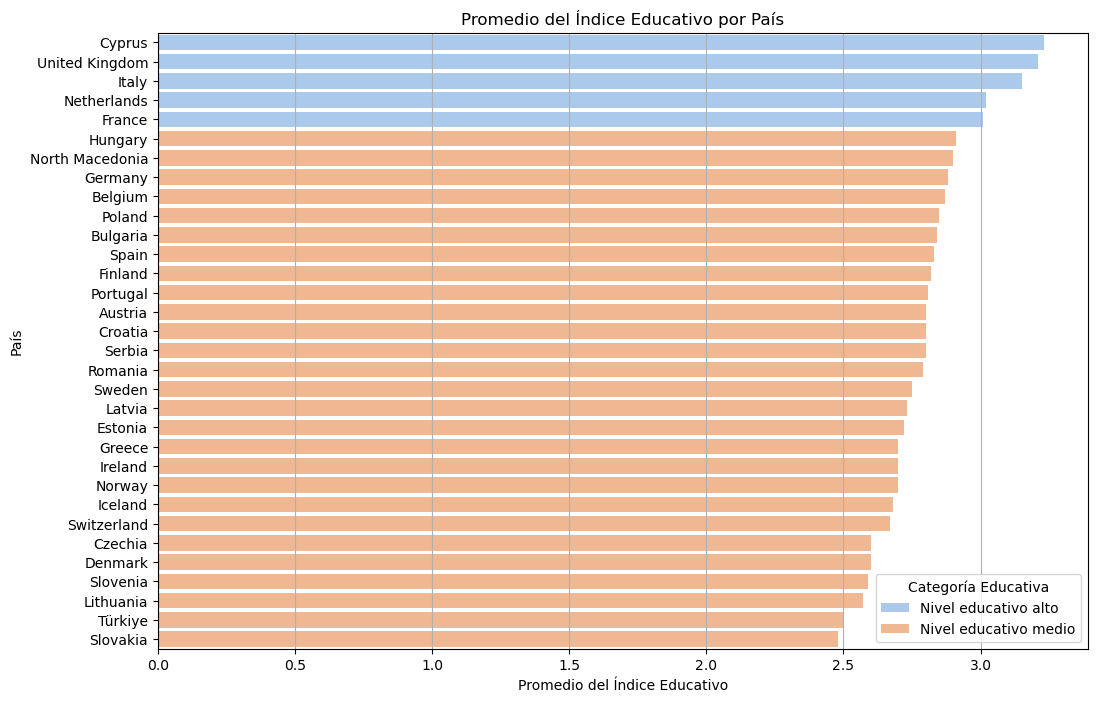

In [10]:
# Llamar a la función con la conexión a la base de datos
plot_avg_education_by_country2(engine)